In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#########################################
# part (a)
#########################################

def normalize(a):
    return (a-a.mean())/a.std()

def h(x, theta_0, theta_1):
    return theta_0 + theta_1*x

def J(x, y, theta_0, theta_1):
    return ((y-theta_0-theta_1*x)**2).mean()/2

def grad_J(x, y, theta_0, theta_1):
    return (-(y-theta_0-theta_1*x).mean(),(-x*(y-theta_0-theta_1*x)).mean())

def gradient_descent(x, y, theta_0, theta_1, eta=0.001, stop_lim=0.0001, t_lim=10000):
    
    theta_0_pts = [theta_0]
    theta_1_pts = [theta_1]
    
    t = 0
    
    while t < t_lim:
        loss_grad = grad_J(x, y, theta_0_pts[-1], theta_1_pts[-1])
        theta_0_n = theta_0_pts[-1] - eta*loss_grad[0]
        theta_1_n = theta_1_pts[-1] - eta*loss_grad[1]
        
        if (abs(theta_0_n-theta_0_pts[-1]) < stop_lim and abs(theta_1_n-theta_1_pts[-1]) < stop_lim):
            break
        
        theta_0_pts.append(theta_0_n)
        theta_1_pts.append(theta_1_n)
        
        t += 1
            
    print(f"Learning Rate: {eta}")
    print("Stopping criteria: ")
    print(f"    |theta_0^(t+1) - theta_0^(t)| < {stop_lim}")
    print(f"    |theta_1^(t+1) - theta_1^(t)| < {stop_lim}")
    print(f"Final parameters: ({theta_0_pts[-1]},{theta_1_pts[-1]})")
    
    return (theta_0_pts, theta_1_pts)

In [14]:
#########################################
# part (b)
#########################################

def plot_data(x, y, theta_0, theta_1, save_file_name=None):
    fig = plt.figure(dpi=150,figsize=(5,3))
    ax = fig.add_axes([0,0,1,1])
    
    ax.set_title("Plot of normalized density vs acidity")
    ax.scatter(x,y,marker='.')
    ax.set_xlabel("acidity")
    ax.set_ylabel("density")
    ax.axline((0, theta_0), slope=theta_1, color='red', label='regression fit')
    ax.legend()
    
    if (save_file_name):
        fig.savefig(f'plots/{save_file_name}.png', bbox_inches = 'tight')
        
    # return fig

In [15]:
#########################################
# part (c)
#########################################

def plot_mesh(x, y, theta_0, theta_1, save_file_name=None):

    theta_0_space = np.linspace(-2,2,65)
    theta_1_space = np.linspace(-2,2,65)
    theta_space   = np.meshgrid(theta_0_space, theta_1_space)

    vector_loss = np.vectorize(J, signature='(m),(m),(),()->()')
    loss_space = vector_loss(x, y, theta_space[0], theta_space[1])

    fig = plt.figure(figsize=(5,5), dpi=150)
    ax = fig.add_axes([0,0,1,1], projection='3d')
    ax.view_init(elev=60, azim=45)
    surf = ax.plot_surface(theta_space[0], theta_space[1], loss_space, cmap='viridis', edgecolor='black')
    #surf.set_facecolor((0,0,0,0))
    #ax.contour3D(theta_space[0], theta_space[1], loss_space, 50, cmap='binary')
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    ax.set_zlabel('loss')
        
    if (save_file_name):
        fig.savefig(f'plots/{save_file_name}.png', bbox_inches = 'tight')
        
    # return fig

In [16]:
#########################################
# part (d)
#########################################

def plot_contour(x, y, theta_0, theta_1, save_file_name=None):

    theta_0_space = np.linspace(-2,2,65)
    theta_1_space = np.linspace(-2,2,65)
    theta_space   = np.meshgrid(theta_0_space, theta_1_space)

    vector_loss = np.vectorize(J, signature='(m),(m),(),()->()')
    loss_space = vector_loss(x, y, theta_space[0], theta_space[1])

    fig = plt.figure(figsize=(3,3), dpi=150)
    ax = fig.add_axes([0,0,1,1])
    CS = plt.contour(theta_0_space, theta_1_space, loss_space)
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    
    #plt.clabel(CS, fmt = '%2.1d', colors = 'k', fontsize=14) #contour line labels
        
    if (save_file_name):
        fig.savefig(f'plots/{save_file_name}.png', bbox_inches = 'tight')
        
    # return fig

In [17]:
#
# Questions:
# 
# 1. "Plotting at each iteration" - What does this mean?
# 2. "Time gap of 0.2 seconds" - do we print the values / do we have to make an animation / what do we need to do?

In [18]:
# [StopConvert]

In [19]:
trainX = np.loadtxt('../data/q1/linearX.csv')
trainY = np.loadtxt('../data/q1/linearY.csv')
normX = normalize(trainX)
normY = normalize(trainY)

In [20]:
thetas = gradient_descent(normX, normY, 0, 0)

Learning Rate: 0.001
Stopping criteria: 
    |theta_0^(t+1) - theta_0^(t)| < 0.0001
    |theta_1^(t+1) - theta_1^(t)| < 0.0001
Final parameters: (-5.071392916722306e-14,0.5551020913740402)


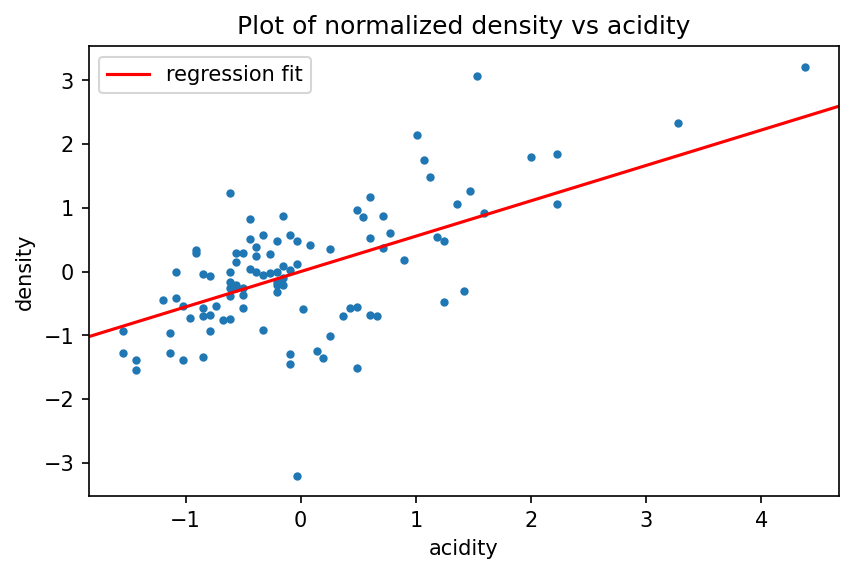

In [21]:
plot_data(normX,normY,thetas[0][-1],thetas[1][-1],save_file_name='b_data_plot')

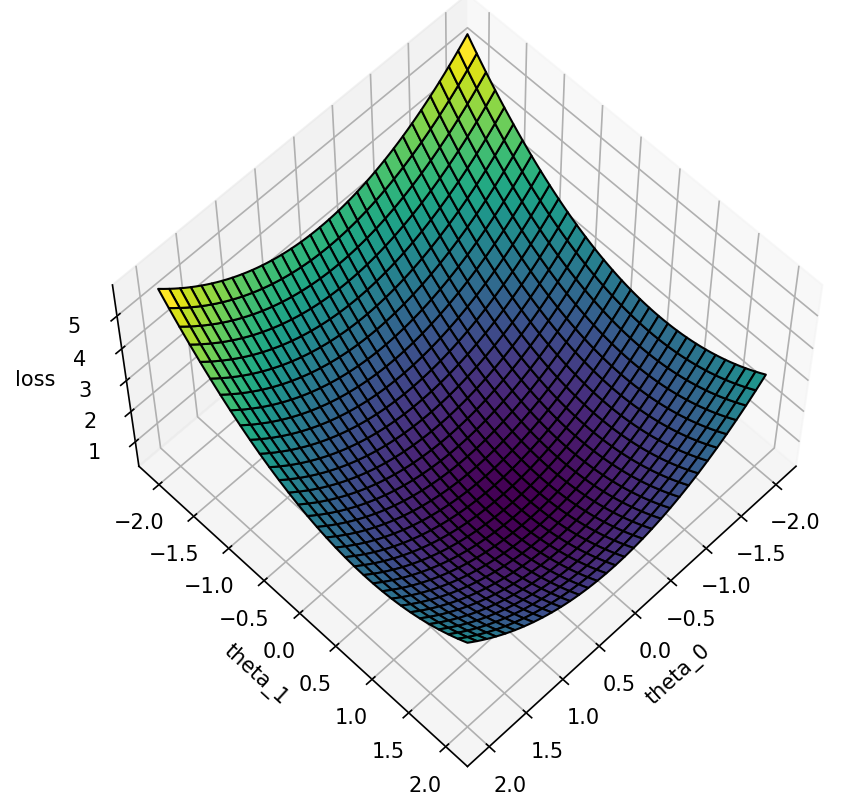

In [22]:
plot_mesh(normX,normY,thetas[0][-1],thetas[1][-1],save_file_name='c_mesh_plot')

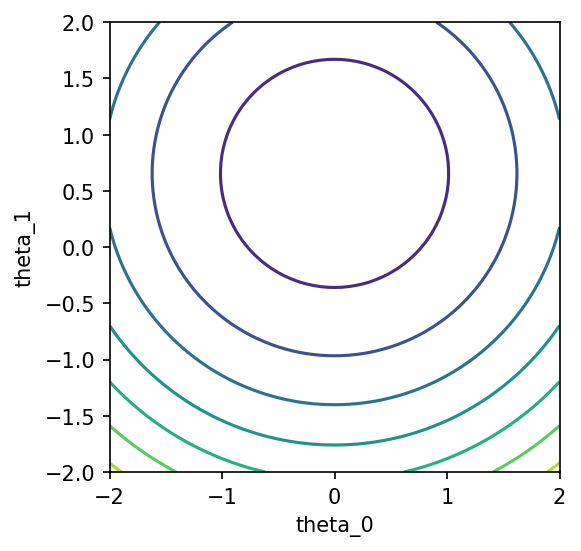

In [23]:
plot_contour(normX,normY,thetas[0][-1],thetas[1][-1],save_file_name='d_contour_plot')